# Chapter 9: The Future of Generative Modeling

## The Transformer

The Transformer was introduced in a [2017 paper](https://arxiv.org/abs/1706.03762) that showed it is possible to make models that predict sequential data without recurrent or convolutional layers. The model uses only an attention mechanism. The authors of the paper use it to for English-German and English-French translation. The model uses stacked attention mechanisms instead of a recurrent network.

### Positional Encoding

The Transformer transforms each sequence of 128 tokens into a 512-dimensional vector. Since the Transformer has no recurrent network, we need to somehow encode the position of each input token, we use a _positional encoding function_, defined below.

$$ \text{PE}_{pos,\,2i} = \sin\bigg(\frac{pos}{10000^{2i/d_\text{model}}}\bigg) $$

$$ \text{PE}_{pos,\,2i+1} = \cos\bigg(\frac{pos}{10000^{(2i + 1)/d_\text{model}}}\bigg)$$

At small values of $i$, the value fluctuates more quickly, whereas for larger values of $i$, the values will be closer together. The positional encoding function is added to the learned encoding matrix. Below is a plot demonstrating positional encoding.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sequence_len = 128
d_model = 512

pe = np.zeros((sequence_len, d_model))

for pos in range(sequence_len):
  for i in range(d_model // 2):
    pe[pos, 2 * i] = np.sin(pos / (10000 ** (2 * i / d_model)))
    pe[pos, (2 * i) + 1] = np.cos(pos / (10000 ** ((2 * i + 1) / d_model)))

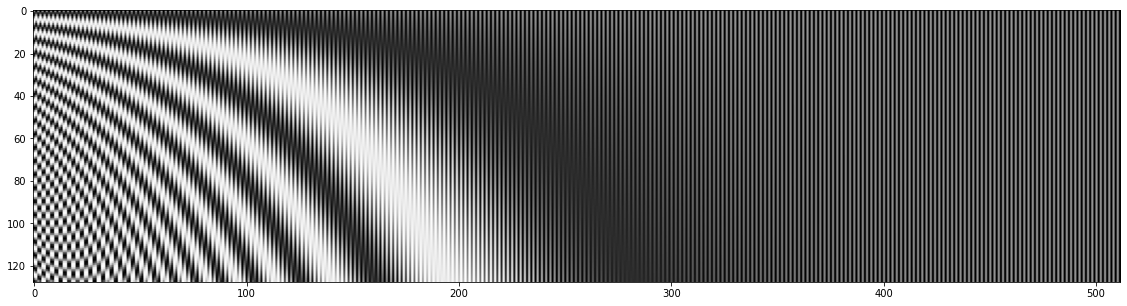

In [3]:
fig = plt.figure(figsize=(20,5))
plt.imshow(pe, cmap='Greys')

In [4]:
embedding = np.random.rand(sequence_len, d_model)

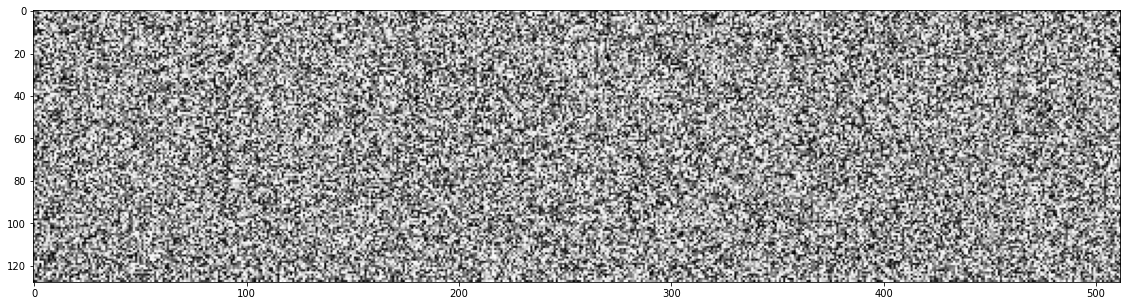

In [5]:
fig = plt.figure(figsize=(20,5))
plt.imshow(embedding, cmap='Greys')

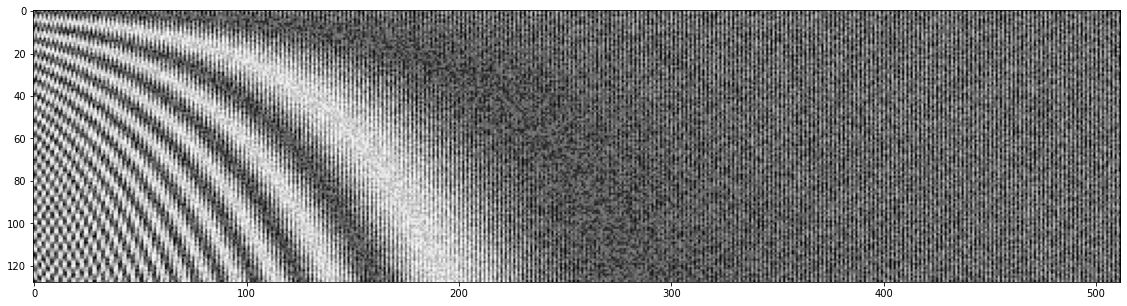

In [6]:
fig = plt.figure(figsize=(20,5))
plt.imshow(embedding + pe, cmap='Greys')

Below is a figure of the Transformer architecture:

<img src="https://miro.medium.com/max/1400/1*BHzGVskWGS_3jEcYYi6miQ.png" alt="Transformer model" height="600">

### Multihead Attention

The model then passes the embedded input into six encoder layers. Each encoder layer starts with a _multihead attention layer_. The layer requires two inputs: the query input, $x_Q$, and the key-value input $x_{KV}$.

We generate three matrices:

$$ Q = x_Q\cdot W_Q \\ K = x_{KV}\cdot W_K \\ V = x_{KV}\cdot W_V $$

We then do _scaled dot-product attention_ after multiplying $Q$ with $K^T$ and scale it down by $\sqrt{d_k}$ and apply a softmax activation function,

$$ \text{softmax}\left(\frac{Q\cdot K^T}{\sqrt{d_k}}\right). $$

We then multiply the resulting matrix with the value matrix, $V$, to get the _attention head_,

$$ A\big(Q,K,V\big) = \text{softmax}\left(\frac{Q\cdot K^T}{\sqrt{d_k}}\right) \cdot V. $$

The paper suggests you train multiple attention heads in parallel and then you concatenate the result and multiply the resulting matrix by a final output weight matrix, $W_O$. Finally there is a skip connection between the final output and the original query input, $x_Q$. The output is then finally sent through a layer normalization layer.

The rest of the encoder just passes the output of the multihead attention layer to a feed-forward dense layer.

### The Decoder

The decoder is mostly the same as the encoder, except it uses two multi-head attention vectors. The first multi-head attention is only used during training and encodes the output shifted to the right. This is done so that the model decoder just does not learn how to copy the input, but rather learns how to predict the next token.

### Anaylzing the Transformer

TensorFlow provides [a notebook](https://colab.sandbox.google.com/github/tensorflow/tensor2tensor/blob/master/tensor2tensor/notebooks/hello_t2t.ipynb#scrollTo=OJKU36QAfqOC) that lets you use a trained Transformer model for English-German translation. There is also a [tutorial](https://www.tensorflow.org/tutorials/text/transformer) on how to implement one for English-Portuguese translation.